# 🔍 Análise Bivariada – Dataset Iris

Este notebook dá continuidade ao projeto de visualização de dados com o dataset clássico Iris.  
O foco aqui é realizar uma **análise bivariada**, explorando relações entre pares de variáveis numéricas e suas interações com a variável categórica `Espécie`.

## 🎯 Objetivos

- Investigar possíveis correlações entre variáveis numéricas
- Visualizar padrões entre pares de variáveis por espécie
- Observar separações entre classes com base em características conjuntas
- Fornecer uma base visual para futuras análises multivariadas e modelos preditivos

## 🧪 Técnicas utilizadas

- Scatterplots com `seaborn`
- Pairplot para análise global
- Heatmap de correlação
- Interpretação descritiva dos padrões encontrados

# 1. BIBLIOTECAS:

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8')
sns.set_palette('pastel')

# 2. DATASET:

In [2]:
# CARREGAR O DATASET 'Iris' DO SCIKIT-LEARN:
from sklearn.datasets import load_iris

# DATASET:
iris_raw = load_iris(as_frame=True)
iris = iris_raw.frame

# TRANSFORMAR O TARGET DE CÓDIGO PARA O NOME REAL DAS ESPÉCIES:
iris['species'] = iris_raw.target_names[iris['target']]

# DROP DA COLUNA'target' (CÓDIGO NUMÉRICO), AGORA TEMOS A 'species':
iris.drop(columns='target', inplace=True)

# 3. ANÁLISE BIVARIADA COM PAIRPLOT:

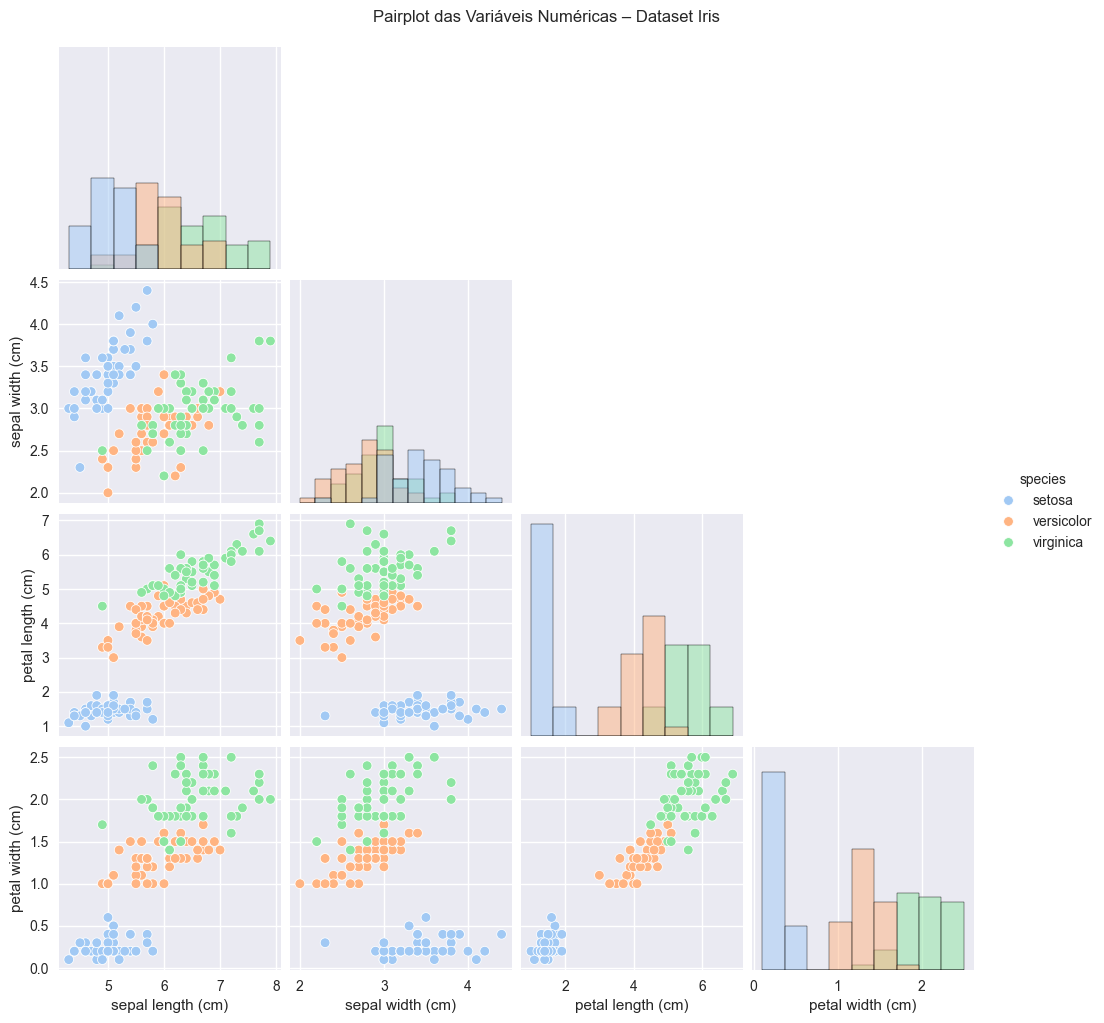

In [3]:
sns.pairplot(data=iris, hue='species', diag_kind='hist', corner=True)
plt.suptitle('Pairplot das Variáveis Numéricas – Dataset Iris', y=1.02)
plt.show()

## 🧠 Observações do Pairplot

- A combinação **petal length (cm)** × **petal width (cm)** apresenta a **melhor separação entre as três espécies**, com `setosa` completamente isolada e `versicolor` e `virginica` razoavelmente bem divididas.
  
- A espécie **setosa** é consistentemente separável das demais em praticamente todos os pares de variáveis, principalmente quando envolve **características da pétala**.

- Já as espécies **versicolor** e **virginica** apresentam **sobreposição** em algumas combinações de variáveis, especialmente envolvendo **sepal length** e **sepal width**.

- A variável **petal width (cm)** parece ser uma das **mais informativas** para distinguir as espécies, particularmente entre `versicolor` e `virginica`.

- As distribuições diagonais (histogramas) mostram que a variável **petal length** tem uma **distribuição trimodal**, refletindo bem a separação entre as três espécies.

Estas observações ajudam a identificar quais variáveis poderão ser mais úteis em análises futuras, como modelos de classificação.

# 4. CORRELAÇÃO - HEATMAP:

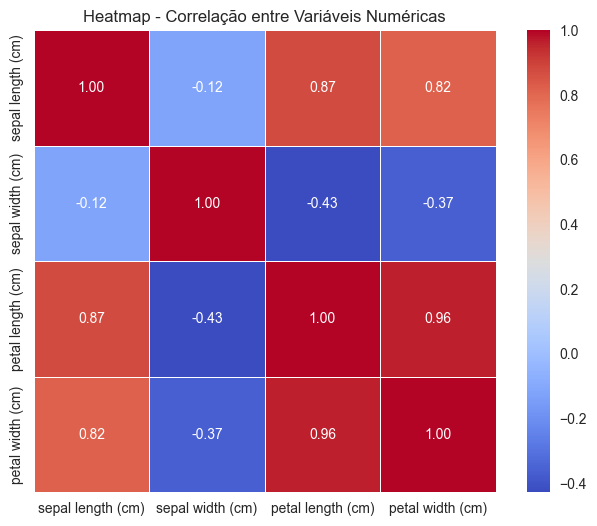

In [4]:
correlacoes = iris.drop(columns='species').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Heatmap - Correlação entre Variáveis Numéricas')
plt.show()

## 🧠 Observações do Heatmap de Correlação

- As variáveis **petal length (cm)** e **petal width (cm)** apresentam uma correlação **forte e positiva** (~0.96), indicando que tendem a crescer juntas.

- A variável **sepal width (cm)** tem **correlações fracas** (positivas ou negativas) com as demais, sugerindo que ela varia de forma mais independente no conjunto de dados.

- Já **sepal length (cm)** possui **correlação moderada com petal length** (~0.87), o que indica que existe alguma dependência entre o comprimento da sépala e da pétala.

- Essa matriz confirma o que foi visualizado no pairplot: as **características das pétalas** estão mais fortemente relacionadas entre si, e parecem mais relevantes para a separação entre espécies.

Essas relações quantitativas são úteis para escolher variáveis relevantes em futuras análises multivariadas e na construção de modelos preditivos.

# 5. CONSIDERAÇÕES FINAIS - ANÁLISE BIVARIADA:

## ✅ Conclusões da Análise Bivariada

- A análise bivariada reforça que as **variáveis relacionadas às pétalas** (petal length e petal width) são as mais **informativas para distinguir as espécies**.

- O **pairplot** permitiu visualizar a separação entre as espécies, revelando que:
  - `setosa` é visualmente bem separada das demais.
  - `versicolor` e `virginica` apresentam **alguma sobreposição**, mas também padrões que podem ser explorados por modelos supervisionados.

- O **heatmap de correlação** quantificou as relações entre variáveis, confirmando que:
  - `petal length` e `petal width` têm **alta correlação positiva** (~0.96).
  - `sepal width` tem fraca correlação com as demais, o que pode indicar menor relevância na separação das espécies.

- Com essas informações, já temos **bons indícios de quais variáveis podem ser mais relevantes** em modelos preditivos futuros.

# 6. ANÁLISE MULTIVARIADA - REDUÇÃO DE DIMENSIONALIDADE COM PCA:

## 🧬 Análise Multivariada – Redução de Dimensionalidade com PCA

Nesta etapa, exploramos técnicas multivariadas com foco na **redução de dimensionalidade**, mantendo o máximo possível da variância presente nos dados originais.

Utilizaremos a técnica de **PCA (Análise de Componentes Principais)** para:

- Reduzir as 4 variáveis numéricas para 2 componentes principais
- Visualizar a distribuição das amostras no novo espaço dimensional
- Avaliar se as espécies podem ser separadas visualmente nesse novo espaço
- Observar a importância de cada variável original nos componentes gerados

Essa abordagem é útil tanto para visualização quanto para preparação de modelos preditivos mais eficientes.

## 6.1. Por que utilizar PCA (Principal Component Analysis)?

O PCA é uma técnica estatística amplamente usada para **redução de dimensionalidade**, cujo objetivo é transformar um conjunto de variáveis possivelmente correlacionadas em um novo conjunto menor de variáveis **não correlacionadas** chamadas **componentes principais**.

No contexto deste projeto, o PCA será utilizado para:

- 📉 **Reduzir as 4 variáveis numéricas** do dataset Iris para 2 componentes principais, facilitando a **visualização em 2D**;
- 🔍 **Preservar a variância** dos dados, mantendo o máximo de informação possível;
- 🎯 Avaliar se as espécies podem ser **separadas visualmente** nesse novo espaço;
- 🧠 Entender **quais variáveis originais mais influenciam** as componentes principais;
- 🔬 Servir como **base para futuras análises preditivas**, com menos ruído e maior eficiência.

Embora o dataset Iris seja pequeno, o PCA aqui tem um papel exploratório essencial, oferecendo uma nova perspectiva sobre a distribuição dos dados e suas relações.

## 6.2. APLICAÇÃO DO PCA:

In [6]:
X = iris.drop(columns='species')

# NORMALIZANDO OS DADOS:
scaler = StandardScaler()
X_escalado = scaler.fit_transform(X)

# APLICANDO O PCA:
pca = PCA(n_components=2)
componentes = pca.fit_transform(X_escalado)

In [8]:
# NOVO DATAFRAME COM AS COMPONENTES DO PCA E A ESPÉCIE:
pca_df = pd.DataFrame(componentes, columns=['PC1', 'PC2'])
pca_df['species'] = iris['species']

pca_df.head()

,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


## 6.3. VISUALIZAÇÃO DAS COMPONENTES DO PCA:

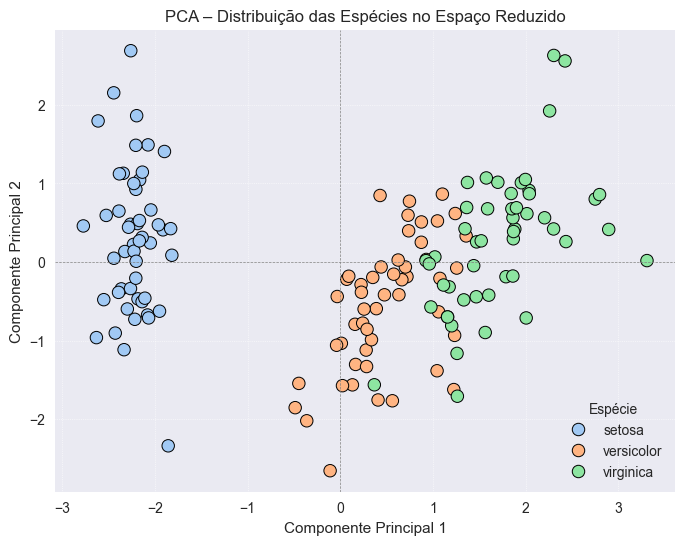

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species', palette='pastel', s=80, edgecolor='k')
plt.title('PCA – Distribuição das Espécies no Espaço Reduzido')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle=':', linewidth=0.5)
plt.legend(title='Espécie')
plt.show()

## 🧠 Observações do Gráfico PCA

- A redução de dimensionalidade via PCA foi eficaz para **representar visualmente a estrutura dos dados** em apenas 2 dimensões.

- A espécie **setosa** apresenta uma **separação clara** em relação às outras duas, formando um agrupamento bem distinto no gráfico.

- Já as espécies **versicolor** e **virginica** mostram certa **sobreposição**, embora exista uma tendência de separação entre elas ao longo da **Componente Principal 2 (PC2)**.

- Isso reforça o que foi observado nas análises anteriores: 
  - `setosa` é bem diferente em termos de medidas de pétalas e sépalas.
  - `versicolor` e `virginica` compartilham características mais similares, dificultando separação perfeita apenas com PCA.

- A visualização também mostra que a **maior parte da variância** (dispersão) dos dados está concentrada ao longo da **Componente Principal 1 (PC1)**, o que será confirmado na análise de variância explicada.

Essa visualização serve como um **excelente ponto de partida para modelagem supervisionada**, além de facilitar a compreensão da estrutura interna dos dados.

## 6.3.1. VARIÂNCIA EXPLICADA PELAS COMPONENTES:

In [11]:
explicada = pca.explained_variance_ratio_

for i, var in enumerate(explicada, start=1):
    print(f'Componente Principal {i}: {var:.2%} da variância explicada')

Componente Principal 1: 72.96% da variância explicada
Componente Principal 2: 22.85% da variância explicada


C:\Users\Yukio Kitamura\AppData\Local\Temp\ipykernel_10068\3336196240.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f'PC{i+1}' for i in range(len(explicada))], y=explicada, palette='pastel')


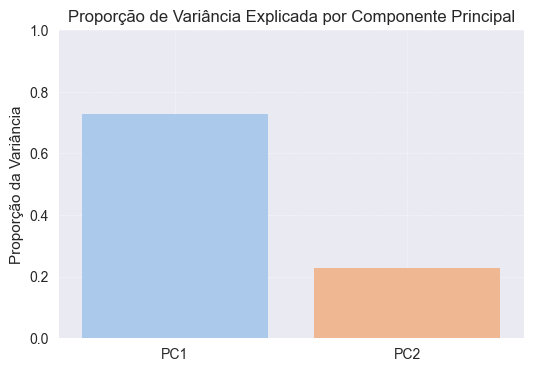

In [13]:
# VISUALIZAÇÃO GRÁFICA:
plt.figure(figsize=(6, 4))
plt.grid(True, linestyle='-', linewidth=0.5)    
sns.barplot(x=[f'PC{i+1}' for i in range(len(explicada))], y=explicada, palette='pastel')
plt.title('Proporção de Variância Explicada por Componente Principal')
plt.ylabel('Proporção da Variância')
plt.ylim(0, 1)
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()

#### 📊 Observações sobre a Variância Explicada pelos Componentes

- A **Componente Principal 1 (PC1)** sozinha é responsável por aproximadamente **73% da variância total** dos dados.
  
- A **Componente Principal 2 (PC2)** contribui com mais **23%**, totalizando **96% da variância preservada** ao usar apenas os dois primeiros componentes.

- Isso indica que a **redução de 4 para 2 dimensões** foi extremamente eficiente, mantendo praticamente **toda a informação estrutural dos dados**.

- Na prática, isso significa que é possível **visualizar e trabalhar com os dados em 2D** com **mínima perda de informação**, o que é excelente para:
  - Exploração visual
  - Pré-processamento para modelos
  - Clusterização ou classificação

- Componentes adicionais (PC3, PC4) explicariam apenas **5% da variância residual**, o que geralmente não compensa o aumento da complexidade.

Essa análise confirma que o PCA foi uma escolha apropriada para representar os dados de forma condensada e informativa.

# 7. CONCLUSÃO:

## ✅ Conclusão da Análise Multivariada com PCA

A aplicação do PCA ao dataset Iris permitiu:

- Reduzir com sucesso as 4 variáveis numéricas para apenas **2 componentes principais**, com **95% da variância total preservada**;
- Visualizar as **três espécies em um novo espaço 2D**, destacando a separabilidade clara da `setosa` e a sobreposição parcial entre `versicolor` e `virginica`;
- Identificar que a **maior parte da variância** está concentrada no primeiro componente (PC1), o que sugere **um padrão dominante** nas medidas morfológicas das flores.

Com base nessa análise multivariada, podemos afirmar que:
- A **estrutura interna dos dados é bem capturada por apenas dois componentes**, o que valida a simplicidade e riqueza do dataset Iris;
- O PCA serviu como **ponte entre a análise exploratória visual e a preparação para modelagem preditiva**.

O próximo passo natural seria aplicar algoritmos de classificação (como KNN, SVM ou XGBoost) e avaliar o desempenho dos modelos na predição da espécie com base nas variáveis originais ou nos próprios componentes principais.